<a href="https://colab.research.google.com/github/AlvaroCarrizales/Proyecto_inteligencia_artificial/blob/master/entrenamientoDiccionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import math as m
from matplotlib import pyplot as plt
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import *

In [48]:
y=[]
X=np.empty((0,288*432), int)
X1=np.empty((0,288*432), int)
for punt in range(0,144):
  directorio="L%d.jpg" % (punt+1)
  a=cv2.imread(directorio)
  rgB=np.matrix(a[:,:,0])
  vector=np.reshape(rgB,(1,288*432))
  X=np.append(X,vector,axis=0)
print(X.shape)
y1 = [8,9,21,13,4,4,9,8,23,16,4,20,21,11,18,23,13,19,22,15,23,26,17,11,3,11,2,21,2,9,13,3,2,9,2,11,8,9,4,3,9,21,21,11,3,6,3,9,9,11,2,9,11,9,16,4,4,11,11,3,4,4,11,3,13,23,2,26,4,13,18,22,26,21,16,24,12,4,18,22,23,18,4,4,7,23,19,23,18,18,2,23,16,12,16,9,21,21,10,11,14,6,4,2,20,5,11,1,19,26,17,11,14,19,19,14,12,16,16,11,12,15,22,18,21,14,13,1,15,14,15,2,21,12,20,19,24,13,15,26,3,16,8,11]
yy = np.array(y1)
print(yy.shape)

(144, 124416)
(144,)


In [0]:
def plot_train_test(estimator, Xtr, Xts, ytr, yts, alpha=.5):
    estimator.fit(Xtr,ytr)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title("TRAIN accuracy %.3f"%estimator.score(Xtr, ytr))
    plt.subplot(122)
    plt.title("TEST accuracy %.3f"%estimator.score(Xts, yts))

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
est = GaussianNB()
s = cross_val_score(est, X, yy, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s)
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.73333333 0.86666667 1.         0.86666667 1.         1.
 0.64285714 0.71428571 0.92857143 0.78571429]
accuracy 0.854 (+/- 0.12376)


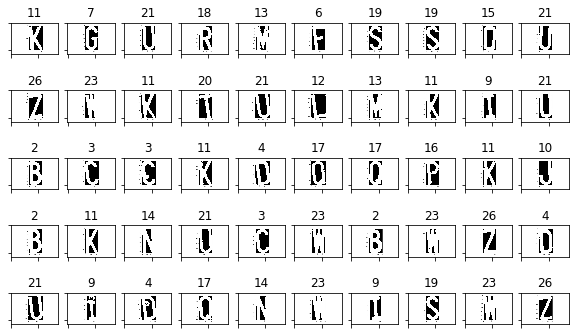

In [51]:
perm = np.random.permutation(range(Xts.shape[0]))[0:50]
random_imgs   = Xts[perm]
random_labels = yts[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title((random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
est = GaussianNB()
est.fit(X,yy)
predictions = est.predict(X)
Xtr, Xts, ytr, yts = train_test_split(X,yy, test_size=.8)

    


[21]


Text(0.5, 0, 'u')

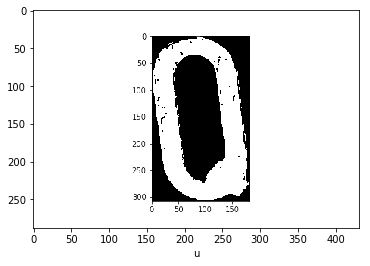

In [56]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i' ,'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
aa=cv2.imread("L146.jpg")
rggB=np.matrix(aa[:,:,0])
vectorr=np.reshape(rggB,(1,288*432))
predictions = est.predict(vectorr)
print(predictions)
plt.imshow(vectorr.reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)
plt.xlabel(class_names[predictions[0]-1])